In [1]:
#Load libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from tysserand import tysserand as ty
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000 
from PIL import Image, ImageOps
import fcsparser

#set up working dir

directory = str("/mnt/SERVER-CRCT-STORAGE/CRCT_Imagin/CORDELIER Pierre/HaloData/21-003.IMMCORE.C1v1/Halo archive 2021-12-07 10-09 - v3.3.2541/ObjectData")
outpath = '/home/mouneem/tysserand/Imagin_LungPredict/nets/'

In [6]:
from stardist.models import StarDist2D 

# prints a list of available models 
StarDist2D.from_pretrained() 

# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')



There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


Text(0.5, 1.0, 'prediction + input overlay')

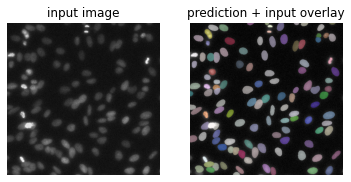

In [7]:

from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

img = test_image_nuclei_2d() 

labels, _ = model.predict_instances(normalize(img))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("prediction + input overlay")